<a href="https://colab.research.google.com/github/IuliaMZbircea/CardioInsight/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary libraries

In [ ]:
import os
import json
import numpy as np
import xgboost as xgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Importing the Framingham Dataset



Import dataset from local machine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Heart_Disease/framingham_dataset.csv')

# Relevant Data Visualisations

To view the first few rows of the dataset:

In [ ]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


To get an overview of the dataset's structure:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


To get statistical summaries of the data:

In [ ]:
dataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Gender distribution:

Females: 2420 and Males: 1820


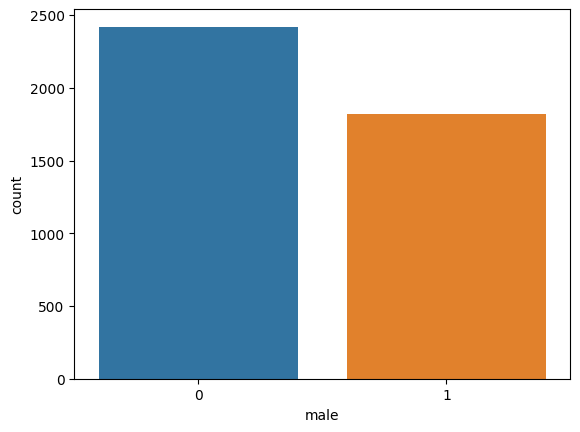

In [ ]:
x=(dataset.male.value_counts())
print(f'Females: {x[0]} and Males: {x[1]}')
p = sns.countplot(data=dataset, x="male")
plt.show()

Bar plot that shows the incidence of heart disease (TenYearCHD) by gender.

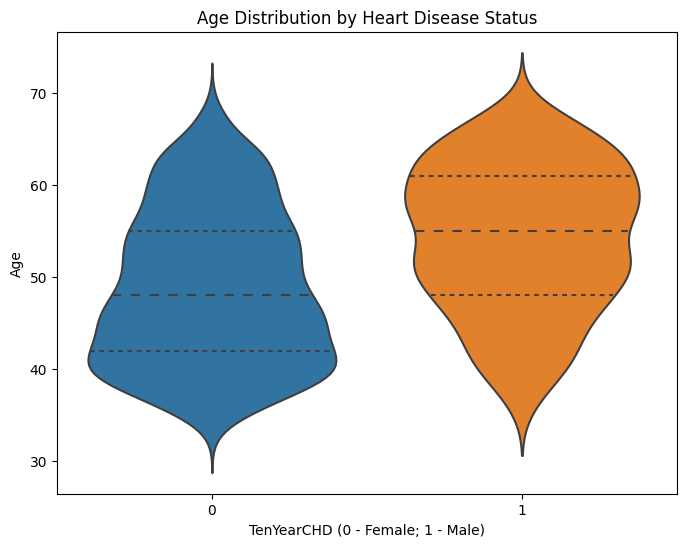

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=dataset, x='TenYearCHD', y='age', inner='quart')
plt.xlabel('TenYearCHD (0 - Female; 1 - Male)')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease Status')
plt.show()


Computing correlation matrix


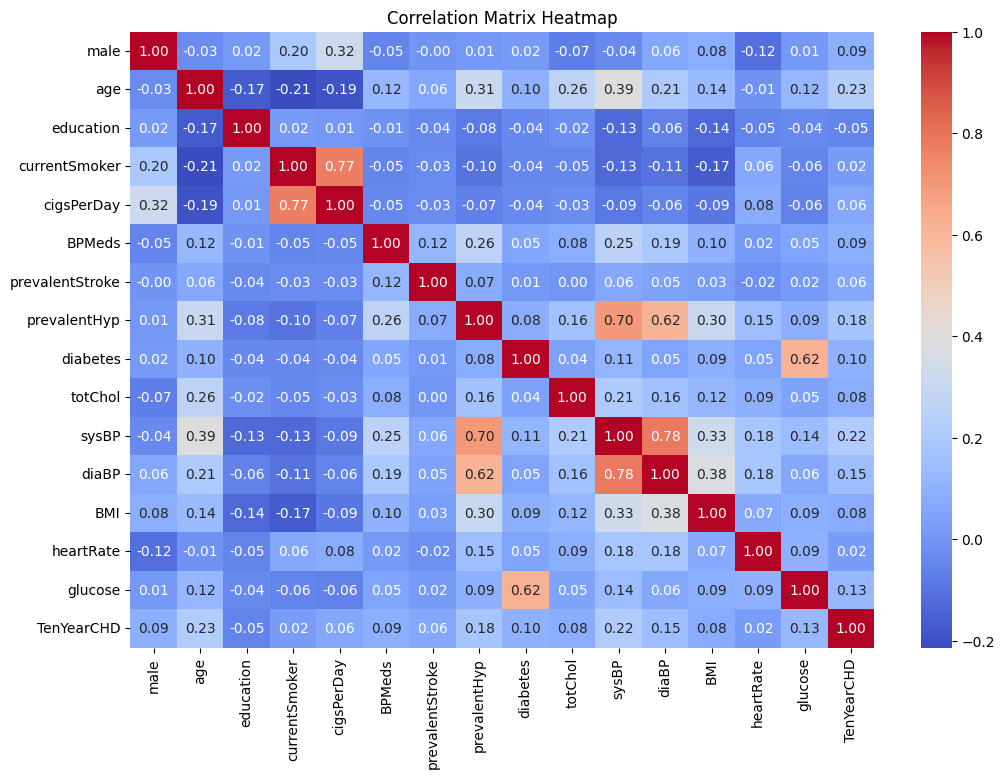

In [ ]:
corr_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Preprocessing


Splitting the dataset into training and testing data

In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
x,y

(array([[ 39.  ,   4.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
        [ 46.  ,   2.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
        [ 48.  ,   1.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
        ...,
        [ 52.  ,   2.  ,   0.  , ...,  21.47,  80.  , 107.  ],
        [ 40.  ,   3.  ,   0.  , ...,  25.6 ,  67.  ,  72.  ],
        [ 39.  ,   3.  ,   1.  , ...,  20.91,  85.  ,  80.  ]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [ ]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (3392, 14) (3392,)
Shape for testing data (848, 14) (848,)


Feature Scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train,x_test

(array([[-0.76990159,  1.97211013,  1.01067013, ..., -0.05431704,
          0.34843656, -0.291875  ],
        [-0.76990159, -0.96076402,  1.01067013, ...,  0.32347974,
         -0.89915077,  0.12730429],
        [-1.11876914,  0.0168607 ,  1.01067013, ..., -0.67429125,
         -1.31501322, -0.24995707],
        ...,
        [-1.23505833,  0.99448542,  1.01067013, ..., -0.33282108,
         -0.48328833, -0.04036743],
        [ 0.85814698, -0.96076402, -0.98944252, ..., -0.38125656,
         -0.06742588, -0.04036743],
        [-1.11876914,  0.0168607 ,  1.01067013, ...,  0.17332974,
         -0.06742588, -0.37571086]]),
 array([[-0.30474486, -0.96076402,  1.01067013, ...,  1.50772735,
          1.5960239 ,  0.21114015],
        [ 0.62556861, -0.96076402, -0.98944252, ...,  0.08614587,
          1.18016145,         nan],
        [ 1.32330372,  0.0168607 ,  1.01067013, ...,  3.05524109,
         -1.56453069, -0.16612121],
        ...,
        [-0.42103404, -0.96076402,  1.01067013, ...,  

Support Vector Machines:


In [ ]:
model = SVC()
model.fit(x_train, y_train)

predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

ValueError: ignored

Random Forests:

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

ValueError: ignored